# Assignment 5

Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method.

Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset with a different encoding
df = pd.read_csv('5-sales_data_sample.csv', encoding ="unicode_escape")

In [3]:
df = df.dropna()

In [4]:
# Select numerical columns for clustering
# Assume we are clustering based on 'SALES', 'QUANTITYORDERED', 'PRICEEACH'

X = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## The Elbow Method in K-Means Clustering

The **Elbow Method** is a technique used to determine the optimal number of clusters in *K-Means Clustering*, an unsupervised learning algorithm often used for data segmentation.

### How the Elbow Method Works

1. **Choose a range of values for $ k $**: Run the K-Means clustering algorithm multiple times, each time with a different number of clusters \( k \), usually starting from $ k=1 $ up to a larger number (like 10 or 20).

2. **Calculate the Within-Cluster Sum of Squares (WCSS)** for each value of $ k $: The WCSS measures the total variance within each cluster. For each cluster, this is the sum of squared distances between each point and the centroid of the cluster. Lower WCSS values indicate that points are closer to their cluster centroids, which is generally desirable.

 
   $$ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2 $$
   

   where:
   - $ k $ is the number of clusters,
   - $ C_i $ represents each cluster,
   - $ x $ is a data point in cluster $ C_i $, and
   - $ \mu_i $ is the centroid of cluster $ C_i $.

3. **Plot $ k $ vs. WCSS**: As $ k $ increases, WCSS typically decreases (as more clusters can better "fit" the data points within each cluster). However, after a certain point, the marginal decrease in WCSS becomes minimal.

4. **Identify the "Elbow" Point**: Look for a point on the plot where the rate of decrease sharply slows down, creating an "elbow" shape. The location of this "elbow" is considered the optimal number of clusters, as increasing $ k $ beyond this point results in diminishing returns in terms of improved cluster compactness.

### Why the Elbow Point is Optimal

The elbow point indicates a balance between two competing factors:
   - **Minimizing WCSS**: Having well-defined clusters where points are close to their centroids.
   - **Avoiding Overfitting**: Not having so many clusters that the model starts to "overfit" the natural groupings in the data.

Choosing $ k $ at the elbow helps achieve meaningful clustering while maintaining model simplicity.

### Inertia in K-Means Clustering

In the context of K-Means clustering and the Elbow Method, **inertia** is another term for the *Within-Cluster Sum of Squares (WCSS)*. It represents how well the clusters formed by the K-Means algorithm fit the data points. Specifically, inertia measures the sum of squared distances between each data point and the centroid of the cluster to which it has been assigned.

In [6]:
from sklearn.cluster import KMeans

# Elbow method to find optimal number of clusters

# Inertia represents how well the clusters formed by the K-Means algorithm fit the data points.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

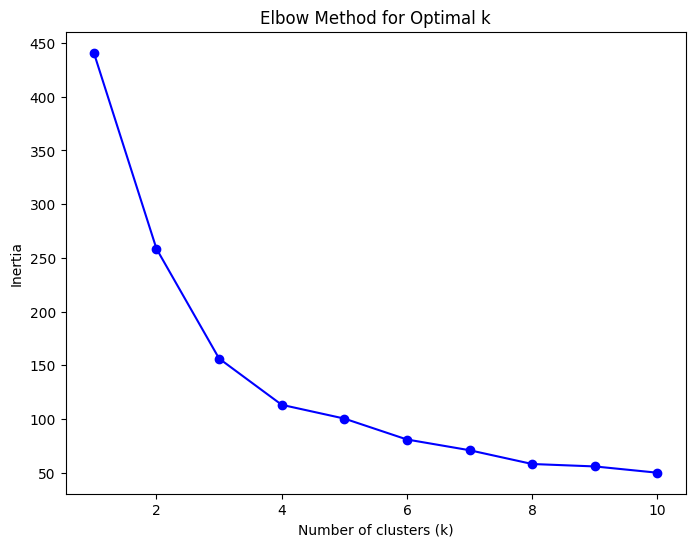

In [7]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
# Choose k based on elbow point (e.g., k=4)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster assignments
df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']]

,SALES,QUANTITYORDERED,PRICEEACH,Cluster
10,3965.66,37,100.00,2
21,1451.00,20,72.55,0
40,4905.39,21,100.00,2
47,3944.70,30,100.00,2
51,2416.56,24,100.00,2
...,...,...,...,...
2667,3268.00,43,76.00,3
2673,1747.20,26,67.20,0
2685,5001.92,44,100.00,1
2764,4277.35,35,100.00,2


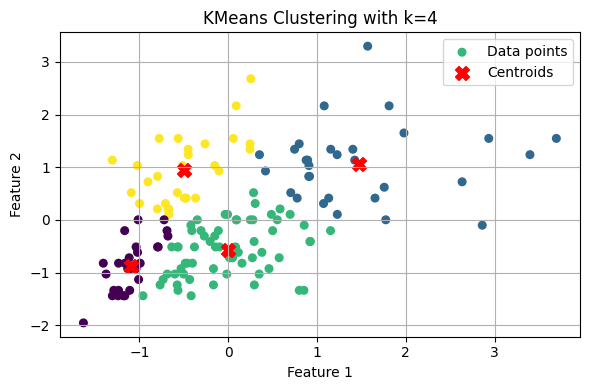

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K = range(1, 6)  # Showing plots for k=1 to 5 (you can go up to 10 if desired)

# for k in K:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=30, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans.labels_)
print(score)

0.43902498795168937
